In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [2]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 16.8MB/s]


In [3]:
!unzip heart-disease-data.zip

Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


In [4]:
df = pd.read_csv('heart_disease_uci.csv')

In [5]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


###EDA and preprocessing the data

In [6]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [7]:
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['fbs'].fillna(df['fbs'].mode(), inplace=True)
df['restecg'].fillna(df['restecg'].mode(), inplace=True)
df['thalch'].fillna(df['thalch'].mean(), inplace=True)
df['exang'].fillna(df['exang'].mode(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)
df['slope'].fillna(df['slope'].mode(), inplace=True)
df['ca'].fillna(df['ca'].mean(), inplace=True)
df.drop('thal', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


In [9]:
#Encoding all the categorical variables

label_encoder = LabelEncoder()

df['cp']= label_encoder.fit_transform(df['cp'])
df['restecg']= label_encoder.fit_transform(df['restecg'])
df['slope']= label_encoder.fit_transform(df['slope'])
df['fbs']= label_encoder.fit_transform(df['fbs'])
df['exang']= label_encoder.fit_transform(df['exang'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['slope']= label_encoder.fit_transform(df['slope'])


In [10]:
df.drop('dataset',axis=1,inplace=True)

In [11]:
#Scaling all the numerical variables

scaler = StandardScaler()
df[['age','trestbps','chol','thalch','oldpeak']] = scaler.fit_transform(df[['age','trestbps','chol','thalch','oldpeak']])

In [12]:
df[['sex','cp','fbs','restecg','exang','slope','ca']]=scaler.fit_transform(df[['sex','cp','fbs','restecg','exang','slope','ca']])

###Model training

In [13]:
x = df.drop('num',axis=1)
y = df['num']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [24]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.5380434782608695


In [16]:
report = classification_report(y_test,model.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.69      0.91      0.79        75
           1       0.42      0.50      0.45        54
           2       0.14      0.04      0.06        25
           3       0.21      0.12      0.15        26
           4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.29      0.31      0.29       184
weighted avg       0.45      0.54      0.48       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


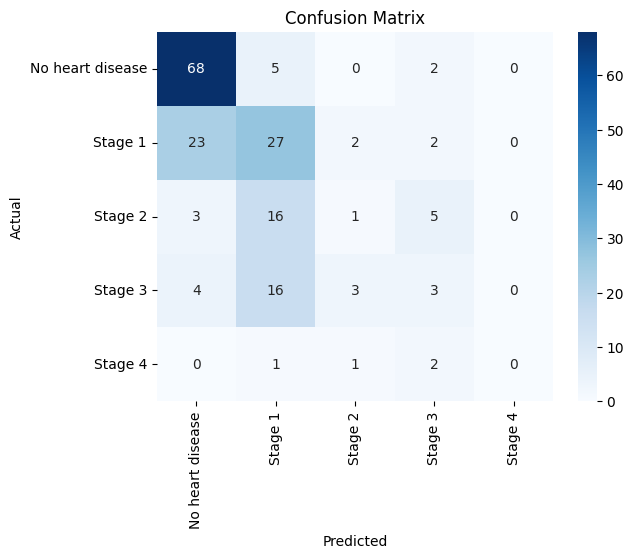

In [29]:
matrix = confusion_matrix(y_test,y_pred)
labels = ['No heart disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()